In [4]:
import numpy as np
from numpy import exp, sqrt, tanh
import matplotlib.pyplot as plt
%matplotlib inline

# Problem 1

In [45]:
def solveAtE(E):
    V0 = 8e-4
    m = 1822
    a = 3
    k = np.sqrt(2*m*E)
    
    ML = np.array([[1,1],
                   [1j*k,-1j*k]])
    if E>V0:
        kp = sqrt(2*m*(E-V0))
        MR = np.array([[1,1],[1j*kp,-1j*kp]])
        Mtilde = np.array([[exp(1j*kp*a),exp(-1j*kp*a)],
                           [1j*kp*exp(1j*kp*a),-1j*kp*exp(-1j*kp*a)]])
    else:
        kp = sqrt(2*m*(V0-E))
        MR = np.array([[1,1],[kp,-kp]])
        Mtilde = np.array([[exp(kp*a),exp(-kp*a)],
                   [kp*exp(kp*a),-kp*exp(-kp*a)]])
    
    M = np.dot(Mtilde,np.linalg.inv(MR).dot(ML))
    
    mat = np.array([[-exp(1j*k*a),M[0,1]],
                    [-1j*k*exp(1j*k*a),M[1,1]]])
    b = np.array([-M[0,0],-M[1,0]])
    SR = np.linalg.solve(mat,b)
    
    return (SR[0],SR[1])
    
    

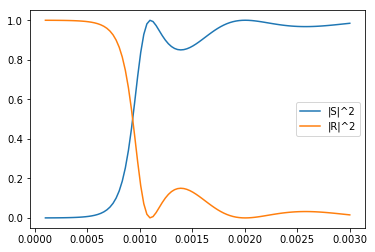

In [54]:
npts = 100
Es = np.linspace(1e-4,3e-3,npts)
S = np.zeros((npts),dtype=np.complex_)
R = np.zeros((npts),dtype=np.complex_)
for (n,E) in enumerate(Es):
    S[n],R[n] = solveAtE(E)
    
plt.plot(Es,abs(S)**2,label="|S|^2")
plt.plot(Es,abs(R)**2,label="|R|^2")
plt.legend()
    

In [53]:
S,R = solveAtE(2.01e-3)
print(abs(R)**2)
print(abs(S)**2)

1.74166454901e-05
0.999982583355


# Problem 2

In [59]:
def V(x,V0=3e-4,a=3):
    return V0*1/(np.cosh(a*x))**2

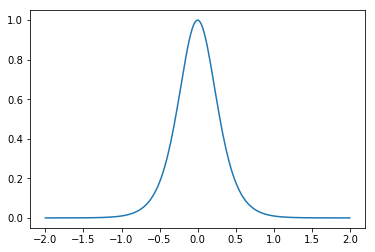

In [66]:
x = np.linspace(-2,2,200)
plt.plot(x,V(x)/V(0))

# Multi-Channel Scattering

In [7]:
lam1 = [0.813, 0.677]
lam2 = [1.2014, 2.2061]
lam3 = [5.5701, 6.2093]
C1 = [3.7457e3, -7.7718e3]
C2 = [6.7280e5, -7.3837e7]
C3 = [-1.2773e5, 3.2149e7]
C4 = [3.4733e6, 2.9743e6]
A = 293.3

def Vsig(r):
    return (C1[0]*exp(-lam1[0]*r) + 
            (C2[0]+C3[0]*r)*exp(-lam2[0]*r) -
            C4[0]/2*(tanh(1.2*(r-lam3[0]))+1)/r**6)

def Vpi(r):
    return (C1[1]*exp(-lam1[1]*r) + 
            (C2[1]+C3[1]*r)*exp(-lam2[1]*r) -
            C4[1]/2*(tanh(1.2*(r-lam3[1]))+1)/r**6)

def Vmat(r):
    V11 = 2/3*Vsig(r) + 1/3*Vpi(r) - A
    V12 = sqrt(2)/3*(Vpi(r)-Vsig(r))
    V22 = 1/3*Vsig(r) + 2/3*Vpi(r) +2*A
    return np.array([[V11,V12],[V12,V22]])

In [47]:
rvals = np.linspace(2,10,500)
evals=[]
for r in rvals:
    ev=np.linalg.eig(Vmat(r))[0]
    evals.append(ev)

(-2000, 40000)

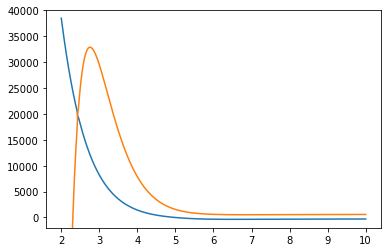

In [48]:
plt.plot(rvals,evals)
plt.ylim(-2000,40000)